In [2]:
import pandas as pd

# Load CSV
df = pd.read_csv("C:/Users/HP/Downloads/SuperstoreDataset/Sample-Superstore.csv", encoding="ISO-8859-1")

# Check for missing values
print(df.isnull().sum())

# Convert date column
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Optional: Remove duplicates
df.drop_duplicates(inplace=True)

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [19]:
print(df.describe())
print(df['Category'].value_counts())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  
Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64


<AxesSubplot: title={'center': 'Sales Over Time'}, xlabel='Order Date'>

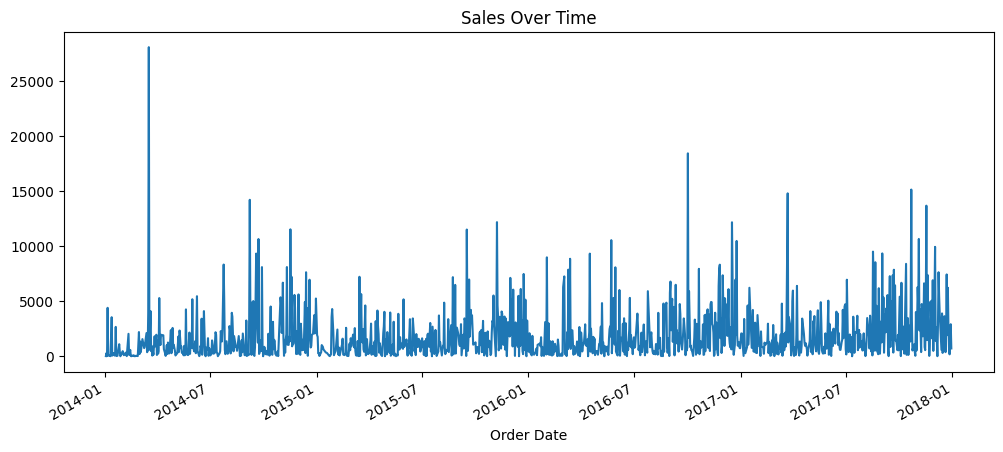

In [20]:
df.groupby('Order Date')['Sales'].sum().plot(figsize=(12, 5), title='Sales Over Time')


<AxesSubplot: title={'center': 'Top 10 Products by Sales'}, ylabel='Product Name'>

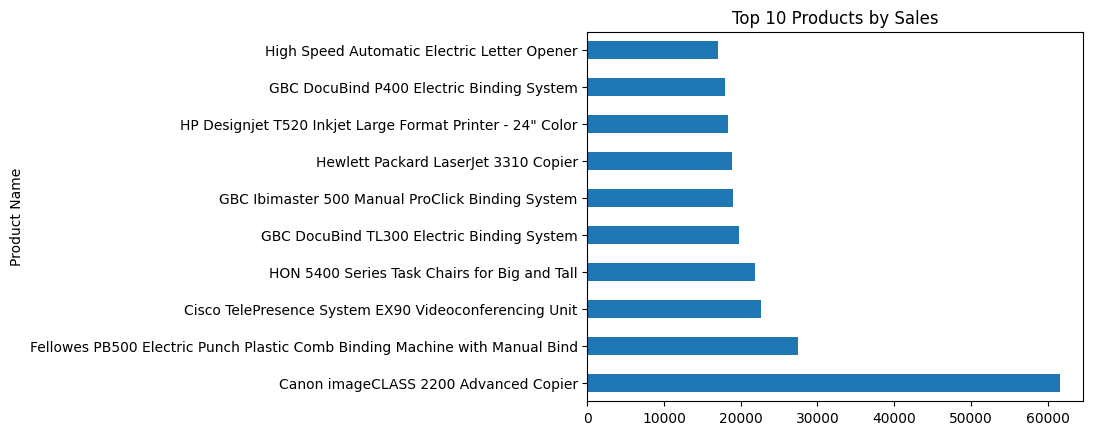

In [21]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', title='Top 10 Products by Sales')

<AxesSubplot: xlabel='Region', ylabel='Sales'>

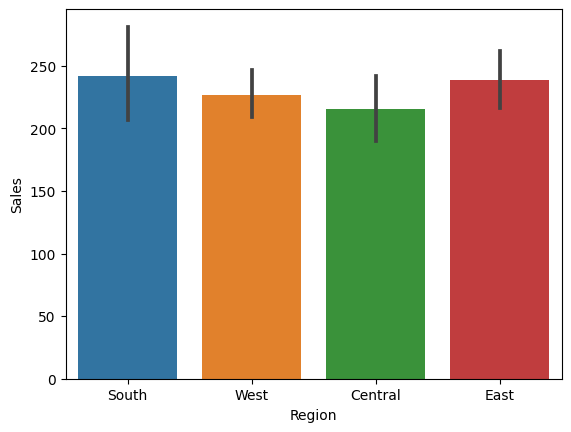

In [10]:
import seaborn as sns
sns.barplot(x='Region', y='Sales', data=df)


##  1. Which products/categories perform best?

<AxesSubplot: title={'center': 'Sales by Category'}, xlabel='Category'>

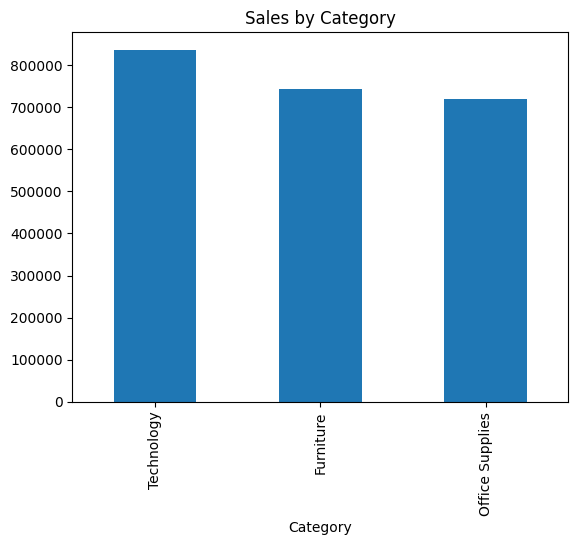

In [6]:
# Top categories by sales
df.groupby('Category')['Sales'].sum().sort_values(ascending=False).plot(kind='bar', title='Sales by Category')

<AxesSubplot: title={'center': 'Top 10 Profitable Products'}, ylabel='Product Name'>

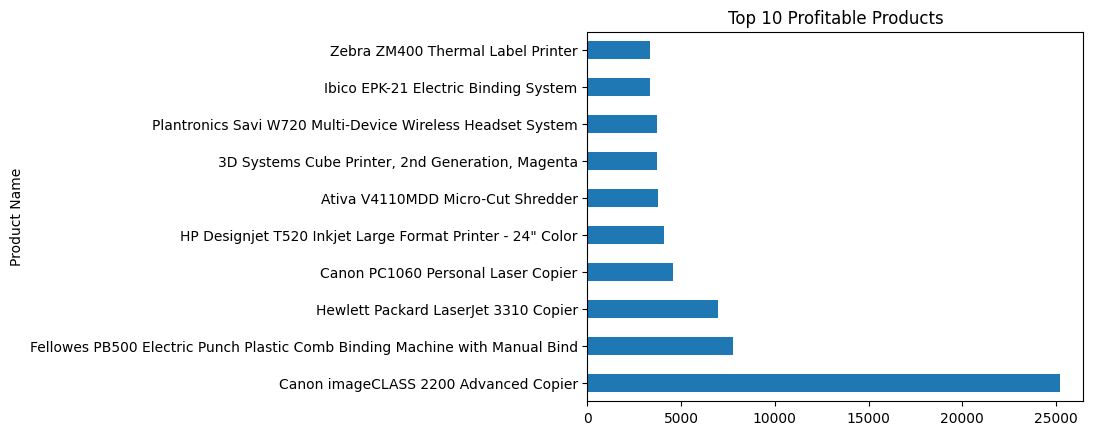

In [7]:
# Top 10 products by profit
df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10).plot(kind='barh', title='Top 10 Profitable Products')

## How do discounts affect profit?

In [11]:
df[['Discount', 'Profit']].corr()

,Discount,Profit
Discount,1.000000,-0.219487
Profit,-0.219487,1.000000


Text(0.5, 1.0, 'Discount vs Profit')

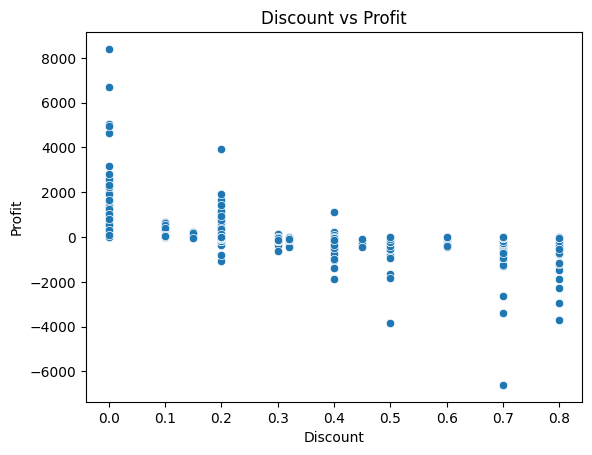

In [12]:
sns.scatterplot(x='Discount', y='Profit', data=df).set_title('Discount vs Profit')

## Which regions/states perform well or poorly?

In [14]:
region_sales = df.groupby('Region')['Sales'].sum()
region_sales

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

<AxesSubplot: title={'center': 'Sales by Region'}, xlabel='Region'>

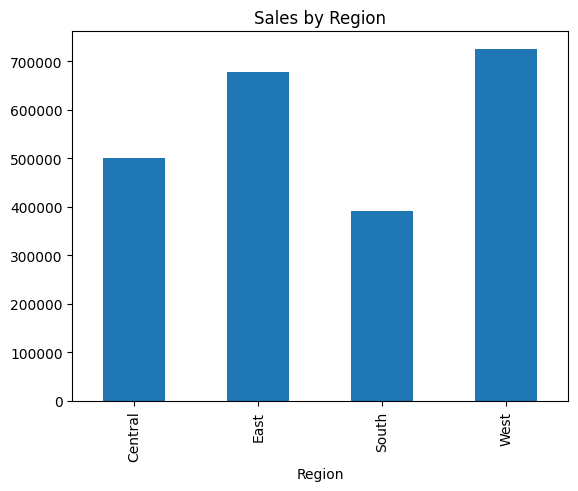

In [15]:
region_sales.plot(kind='bar', title='Sales by Region')

<AxesSubplot: title={'center': 'Monthly Sales Trend'}, xlabel='Month'>

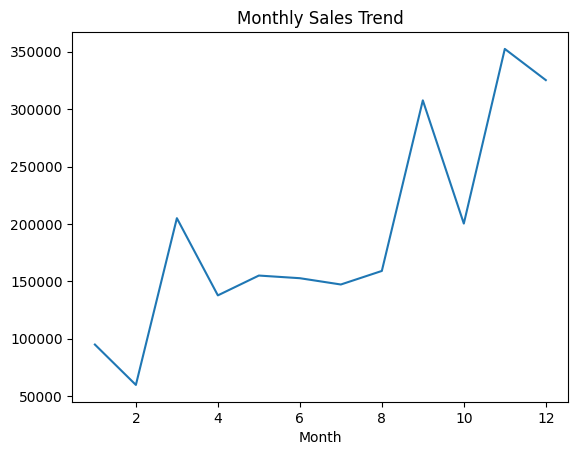

In [36]:
df['Month'] = df['Order Date'].dt.month
# df['Month'] = pd.to_datetime(df['Month'], format='%m').dt.month_name()
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(title='Monthly Sales Trend')


##  Who are the most valuable customers?

<AxesSubplot: title={'center': 'Top 10 Customers by Sales'}, ylabel='Customer Name'>

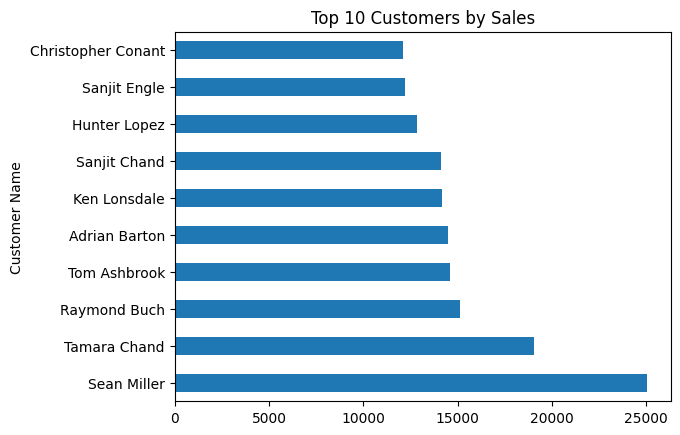

In [37]:
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='barh', title='Top 10 Customers by Sales')

In [39]:
df.groupby('Customer Name')['Sales'].sum()

Customer Name
Aaron Bergman          886.156
Aaron Hawkins         1744.700
Aaron Smayling        3050.692
Adam Bellavance       7755.620
Adam Hart             3250.337
                        ...   
Xylona Preis          2374.658
Yana Sorensen         6720.444
Yoseph Carroll        5454.350
Zuschuss Carroll      8025.707
Zuschuss Donatelli    1493.944
Name: Sales, Length: 793, dtype: float64